In [2]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
city_csv = os.path.join("city_data.csv")
ride_csv = os.path.join("ride_data.csv")

In [4]:
city_df = pd.read_csv(city_csv)
ride_df = pd.read_csv(ride_csv)

In [5]:
city_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [6]:
ride_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [7]:
merged = pd.merge(ride_df, city_df, how="left", on=["city","city"])
merged.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942,35,Urban
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587,55,Urban
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892,68,Urban
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673,8,Urban


In [24]:
rural = merged[merged["type"]=="Rural"]
urban = merged[merged["type"]=="Urban"]
suburban = merged[merged["type"]=="Suburban"]
rural.head()

,city,date,fare,ride_id,driver_count,type
2282,Horneland,2016-07-19 10:07:33,12.63,8214498891817,8,Rural
2283,Kinghaven,2016-05-18 23:28:12,20.53,6432117120069,3,Rural
2284,New Johnbury,2016-04-21 08:30:25,56.60,9002881309143,6,Rural
2285,South Joseph,2016-02-17 01:41:29,57.52,7365786843443,3,Rural
2286,Kennethburgh,2016-10-19 13:13:17,24.43,2728236352387,3,Rural


In [9]:
grouped_rural_fare = rural.groupby(["city"]).mean()["fare"]

grouped_rural_riders = rural.groupby(["city"]).count()["ride_id"]

grouped_rural_drivers = rural.groupby(["city"]).mean()["driver_count"]

In [10]:
grouped_urban_fare = urban.groupby(["city"]).mean()["fare"]

grouped_urban_riders = urban.groupby(["city"]).count()["ride_id"]

grouped_urban_drivers = urban.groupby(["city"]).mean()["driver_count"]

In [11]:
grouped_suburban_fare = suburban.groupby(["city"]).mean()["fare"]

grouped_suburban_riders = suburban.groupby(["city"]).count()["ride_id"]

grouped_suburban_drivers = suburban.groupby(["city"]).mean()["driver_count"]

In [12]:
grouped = merged.groupby(["city"])
sum_cities = pd.DataFrame(grouped["fare"].sum())
sum_cities = sum_cities.reset_index()
sum_cities.rename(columns={"fare":"Total Fare"})
sum_cities.head()

,city,fare
0,Alvarezhaven,741.79
1,Alyssaberg,535.85
2,Anitamouth,335.84
3,Antoniomouth,519.75
4,Aprilchester,417.65


In [13]:
#final_merge = next_merge.rename(columns={"city":"City",
                                            #"fare_y":"Average Fare Per City",
                                            #"ride_id":"Total Number of Rides Per City",
                                            #"driver_count":"Total Number of Drivers Per City",
                                            #"type":"City Type",
                                            #"fare_x":"Total Fare Per City"})
#final_merge.head()

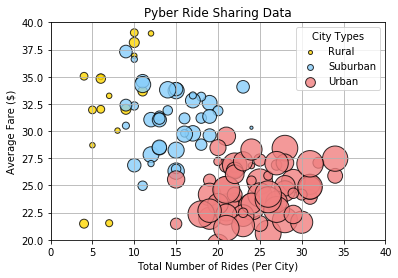

In [22]:
plt.scatter(grouped_rural_riders, grouped_rural_fare, 
            marker="o", facecolors="gold", alpha=0.8, s=grouped_rural_drivers*10, edgecolors="black",label="Rural")
plt.scatter(grouped_suburban_riders, grouped_suburban_fare, 
            marker="o", facecolors="lightskyblue", alpha=0.8, s=grouped_suburban_drivers*10, edgecolors="black",label="Suburban")
plt.scatter(grouped_urban_riders, grouped_urban_fare, 
            marker="o", facecolors="lightcoral", alpha=0.8, s=grouped_urban_drivers*10, edgecolors="black",label="Urban")

plt.title("Pyber Ride Sharing Data")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()
plt.xlim(left=0, right=40)
plt.ylim(bottom=20,top=40)
plt.legend(loc="upper right", title="City Types", markerscale=0.5)
plt.show()

In [25]:
rural_fare = rural["fare"].sum()
urban_fare = urban["fare"].sum()
suburban_fare = suburban["fare"].sum()
total = ride_df["fare"].sum()
rural_percent = (rural_fare/total)*100
urban_percent = (urban_fare/total)*100
suburban_percent = (suburban_fare/total)*100

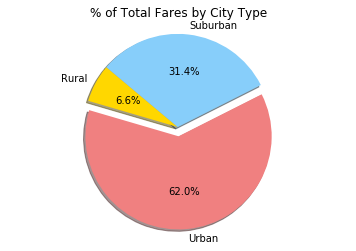

In [38]:
labels = ["Rural", "Urban", "Suburban"]

sizes = [rural_percent, urban_percent, suburban_percent]

colors = ["gold", "lightcoral", "lightskyblue"]

explode = (0, 0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Fares by City Type")
plt.axis("equal")
plt.show()

In [34]:
total_rides = ride_df["ride_id"].count()
rural_rides_percent = (grouped_rural_riders.sum()/total_rides)*100
urban_rides_percent = (grouped_urban_riders.sum()/total_rides)*100
suburban_rides_percent = (grouped_suburban_riders.sum()/total_rides)*100

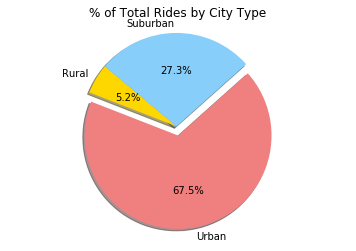

In [35]:
labels = ["Rural", "Urban", "Suburban"]

sizes = [rural_rides_percent,urban_rides_percent,suburban_rides_percent]

colors = ["gold", "lightcoral", "lightskyblue"]

explode = (0, 0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Rides by City Type")
plt.axis("equal")
plt.show()

In [39]:
total_drivers = city_df["driver_count"].sum()
rural_drivers_percent = (grouped_rural_drivers.sum()/total_drivers)*100
urban_drivers_percent = (grouped_urban_drivers.sum()/total_drivers)*100
suburban_drivers_percent = (grouped_suburban_drivers.sum()/total_drivers)*100

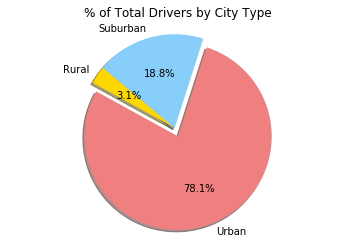

In [37]:
labels = ["Rural", "Urban", "Suburban"]

sizes = [rural_drivers_percent,urban_drivers_percent,suburban_drivers_percent]

colors = ["gold", "lightcoral", "lightskyblue"]

explode = (0, 0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Drivers by City Type")
plt.axis("equal")
plt.show()

1. Urban cities tend to have a greater total number of rides per city than rural or suburban cities.
2. At 78.1%, urban has significantly more drivers than rural or suburban.
3. The average fares for rural and suburban cities tend to be higher than urban cities. 